# Final Project in COMP 767

This project is an implementation of the paper **Active Object Localization with Deep Reinforcement Learning** (http://slazebni.cs.illinois.edu/publications/iccv15_active.pdf).
This paper goal is do detection on the VOC 2007 dataset. To acheive it it propose an reinforcement leanring algorithm that consider each image of the dataset as an different environement for an agent that as the goal to find the thighest bounding box around object of a specific class. 
The agent uses deep reinforcement leaning to accomplish its goal.

## Imports

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.models as models

import gym_project.envs.object_localization as object_localization
from agent import Agent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Training

In [10]:
BATCH_SIZE = 64
DISCOUNT_RATE = 0.99
EPS_START = 1.0
EPS_END = 0.1
EPS_DECAY = 5
TARGET_UPDATE = 20
NB_EPOCH = 10
MEMORY_SIZE = 10000
NB_ACTION_IN_HISTORY = 10
DETECTED_CLASS = 11

env = object_localization.ProjectEnv(detected_class = DETECTED_CLASS)
agent = Agent(env, 
              target_update=TARGET_UPDATE, 
              discout_rate=DISCOUNT_RATE,
              eps_start=EPS_START, 
              eps_end=EPS_END, 
              eps_decay=EPS_DECAY,
              batch_size=BATCH_SIZE, 
              memory_size=MEMORY_SIZE, 
              n_past_action_to_remember=NB_ACTION_IN_HISTORY)
lenghts = agent.train(env)
print(lenghts)

Environement initializatione done for class : dog
Agent initialization done
0.8755718206770357
Episode : 0, len : 7
0.8943726172716725
Episode : 1, len : 3
0.7321509777171441
Episode : 2, len : 3
0.6760416666666667
Episode : 3, len : 5
0.7819548872180451
0.6033114084826491
Episode : 4, len : 6
0.6778169014084507
Episode : 5, len : 4
0.6130747575852361
Episode : 6, len : 6
0.7181030775846182
Episode : 7, len : 3
0.6925064599483204
Episode : 8, len : 3


KeyboardInterrupt: 

In [11]:
print(len(env.detected_class_indexes))

421


In [12]:
import os
directory = f"/DETECTED_CLASS={DETECTED_CLASS}_NB_EPOCH={NB_EPOCH}_DISCOUNT_RATE={DISCOUNT_RATE}"\
            f"_BATCH_SIZE={BATCH_SIZE}_DISCOUNT_RATE_{DISCOUNT_RATE}_TARGET_UPDATE={TARGET_UPDATE}"\
            f"_NB_ACTION_IN_HISTORY={NB_ACTION_IN_HISTORY}"
print(directory)

def get_directory_name_with_number(base_path)
    i = 0
    while os.path.exists(base_path + "_" + str(i)):
        i += 1
    return base_path + "_" + str(i)

os.mkdir(experiment_path)

/DETECTED_CLASS=11_NB_EPOCH=10_DISCOUNT_RATE=0.99_BATCH_SIZE=64_DISCOUNT_RATE_0.99_TARGET_UPDATE=20_NB_ACTION_IN_HISTORY=10


## Testing

0.7394733136178003
Timesteps :1
Action : reset, Reward : 0, IoU : 0.7394733136178003


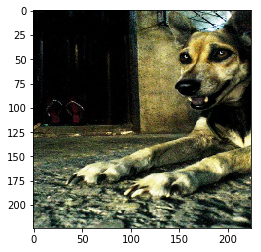

Action : trigger, Reward : 3, IoU : 0.7394733136178003


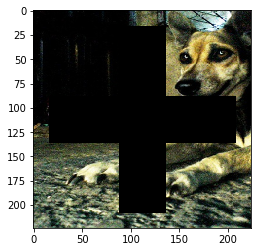

In [17]:
imgs, actions, rewards, ious, t = agent.test_episode(env)
print(f"Timesteps :{t}")
for img, action, reward, iou in zip(imgs, actions, rewards, ious):
    print(f"Action : {action}, Reward : {reward}, IoU : {iou}")
    plt.imshow(img)
    plt.show()